In [76]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [81]:
data = ascii.read('../data/nearest-stars', data_start=3, format='fixed_width_two_line')
data

InconsistentTableError: Position line should only contain delimiters and one other character, e.g. "--- ------- ---".

In [68]:
df = pd.read_table('../data/bsc5-vizier', sep=';', skiprows=127)
df = df.drop([0, 1])
df = df.infer_objects()

In [69]:
columns = ['Vmag', 'B-V', 'Parallax']
for col in columns:
    df[col] = df[col].str.replace(r'[a-zA-Z]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [70]:
df['Par-Dist'] = (1 / df['Parallax']) * (180 * 3600 / np.pi)
df['Absmag'] = df['Vmag'] - 5 * (np.log10(df['Par-Dist']) - 1)

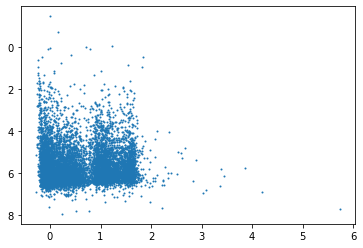

In [73]:
plt.scatter(df['B-V'], df['Vmag'], s=1)
plt.gca().invert_yaxis()

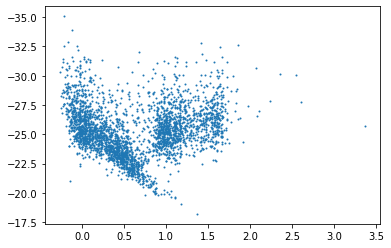

In [74]:
plt.scatter(df['B-V'], df['Absmag'], s=1)
plt.gca().invert_yaxis()